## Corpus Creation

- Seperation of articles and summaries from dataset
- Raw corpus - 91590
- Character, Word, Sentence count in both articles and summaries
- Corpus with Statistics
- Cleaning of short/empty articles
- Cleaning of conversations => Regex search for a word starting with a capital letter and finished by : 
- Removing pattern that do not add value : Website.com ,CLICK HERE.*', '\(CNN\)', 'NEW\:', 'All righs reserved\.
- Cleaned Corpus - 90887
- Histogram of characters, Words, Sentences between articles and summaries

In [6]:
# stories='./data/raw/cnn_stories/'
# seperated_stories='./data/seperated/stories/'
# seperated_summaries='./data/seperated/summaries/'


stories='../cnn_stories/'
seperated_stories='../../seperated/stories/'
seperated_summaries='../../seperated/summaries/'

In [2]:
import os
import time
import string
import re
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import codecs

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk import pos_tag

##### Data Seperation



In [3]:
def read_raw_data(text):

    story_end = text.find('@highlight')

    # stories- remove first part with CNN office and double dash
    story = text[:story_end]
    index = story.find('(CNN) -- ')
    if index > -1:
        story = story[index + len('(CNN) -- '):]
    # removing double spaces
    story = story.replace('\n\n', '\n')


    # get the highlights
    highlights = text[story_end:].split('@highlight')
    # handling white space 
    highlights = [h.strip() for h in highlights if len(h) > 0]
    highlights = [h.strip('\n') for h in highlights if len(h) > 0]
    while '' in highlights:
        highlights.remove('')
    highlights = [t + '.\n' for t in highlights]

    summary = ''.join(highlights)
    return story, summary

In [7]:

i = 0



os.chdir(stories)

for file in os.listdir():
    if file.endswith(".story"):
        file_path=f"{stories}{file}"
        with open(file_path,'r') as f:
            try:
                data=f.read()
            except:
                continue

    print('File being processed {0:06d}'.format(i), end='\r')

    story, summary = read_raw_data(data)
    
    story_name = seperated_stories+ 'story-' + '{0:06d}'.format(i) +'.txt'
    summary_name = seperated_summaries + 'summary-' + '{0:06d}'.format(i) + '.txt'

    # Write file with story
    file_story = open(story_name, 'w')
    file_story.write(story)
    file_story.close()

    # Write file with summary
    file_summary = open(summary_name, 'w')
    file_summary.write(summary)
    file_summary.close()
    i += 1
    

In [8]:
def read_txt_file(filename):
    file = codecs.open(filename, encoding='utf-8',errors='ignore')
    text = file.read()
    file.close()
    return text

In [9]:
list_articles = os.listdir(seperated_stories)
list_summaries = os.listdir(seperated_summaries)

t0 = time.time()

corpus = pd.DataFrame( columns = ['article','summary'])
i = 1
for article_file in list_articles:
    str_count = str(i)  
    print('Number of articles read: {}'.format(str_count), end='\r')
    number = int(article_file[-10:-4])
    summary_file = 'summary-'+ article_file[-10:]
    if summary_file in list_summaries:
        article = read_txt_file(seperated_stories + '/' + article_file)
        summary = read_txt_file(seperated_summaries + '/' +summary_file)
        corpus.loc[number] = [article, summary] 
        i += 1
    
print()
print('Total time to execute: {:.2f} minutes'.format((time.time() - t0)/60))

Number of articles read: 91590
Total time to execute: 29.71 minutes


In [10]:
print(len(corpus))

91590


In [11]:
corpus.sort_index(inplace = True)
corpus.sample(5)

article  \
39065  Nearly a year ago, a big-budget film crew foun...   
60326  The Senate approved a controversial $858 billi...   
30700  Garcia, Mexico (CNN)   -- Officials in a north...   
85148  Rio will be the first city in South America to...   
80429  A Planned Parenthood clinic in Wisconsin remai...   

                                                 summary  
39065  Drama "Black Gold" unites stars of Hollywood, ...  
60326  NEW: The House Rules Committee will allow a vo...  
30700  Garcia mayor: Many citizens want training "to ...  
85148  Fernando Meirelles says the Rio Games will be ...  
80429  Explosive device was found around 7:40 p.m. Su...

In [12]:
CORPUS_FILE_RAW = 'raw_corpus.pkl'
corpus.to_pickle('../../corpus/'+ CORPUS_FILE_RAW)
# corpus = pd.read_pickle('../../corpus/'+ CORPUS_FILE_RAW)

In [13]:
def tokens_without_punctuation(text):
    tokens = word_tokenize(text)
    no_punctuation = [x for x in tokens if not re.fullmatch('[' + string.punctuation + ']+', x)]
    return no_punctuation

def len_tokens_without_punctuation(text):
    return(len(tokens_without_punctuation(text)))

def sentence_tokenize(text):
    ''' Correctly separates in unique sentence, sentences that are terminated by newline "/n" 
        but no punctuation
    '''
    sentence_tokenized = list()
    for txt in text.split('\n'):
        sentence_tokenized += sent_tokenize(txt)
    return sentence_tokenized

def len_sentence_tokenize(text):
    return len(sentence_tokenize(text))

In [14]:
t0 = time.time()
corpus['article_char_count'] = corpus['article'].apply(len)
corpus['article_word_count'] = corpus['article'].apply(len_tokens_without_punctuation)
corpus['article_sentence_count'] = corpus['article'].apply(len_sentence_tokenize)
corpus['summary_char_count'] = corpus['summary'].apply(len)
corpus['summary_word_count'] = corpus['summary'].apply(len_tokens_without_punctuation)
corpus['summary_sentence_count'] = corpus['summary'].apply(len_sentence_tokenize)
print()
print('Total time to execute: {:.2f} minutes'.format((time.time() - t0)/60))


Total time to execute: 12.24 minutes


In [15]:
CORPUS_FILE_STATS = 'raw_corpus_statistics.pkl'
corpus.to_pickle('../../corpus/' + CORPUS_FILE_STATS)
# corpus = pd.read_pickle('../../corpus/' + CORPUS_FILE_STATS)

In [16]:
# corpus = pd.read_pickle("./data/corpus/corpus_with_statistics.pkl")
corpus.sort_index(inplace = True)
corpus.sample(5)

article  \
89359  The Force is strong with this one.\r\nThis yea...   
14231  The future of design could see the divide betw...   
50589  The alleged gang rape of a 15-year-old girl on...   
42871  Whether or not Saudi Arabia's Kingdom Tower wi...   
2408   SAO PAULO, Brazil (Reuters)  -- A Colombian ma...   

                                                 summary  article_char_count  \
89359  Hot Wheels has a line of "Star Wars" cars comi...                1148   
14231  Professor of design Don Norman wants designers...                4589   
50589  Commentators focused on why students didn't re...                6818   
42871  VIPs visiting the building will be able to cal...                2705   
2408   Lawyer tells newspaper alleged drug kingpin is...                3172   

       article_word_count  article_sentence_count  summary_char_count  \
89359                 197                      14                 139   
14231                 763                      41                 211   
50589                1117                      61                 220   
42871                 463                      23                 244   
2408                  535                      25                 297   

       summary_word_count  summary_sentence_count  
89359                  27                       3  
14231                  30                       3  
50589                  35                       3  
42871                  42                       3  
2408                   44                       4

In [18]:
corpus.describe().T

count         mean          std   min     25%  \
article_char_count      91590.0  3917.104040  2040.346205   2.0  2302.0   
article_word_count      91590.0   659.652145   345.993464   0.0   385.0   
article_sentence_count  91590.0    34.261404    20.379003   0.0    19.0   
summary_char_count      91590.0   264.589082    57.644282  52.0   223.0   
summary_word_count      91590.0    42.570990     9.795157   7.0    36.0   
summary_sentence_count  91590.0     3.627285     0.648160   1.0     3.0   

                           50%     75%      max  
article_char_count      3613.0  5198.0  11722.0  
article_word_count       608.0   877.0   1899.0  
article_sentence_count    30.0    45.0    356.0  
summary_char_count       268.0   310.0    610.0  
summary_word_count        43.0    50.0    106.0  
summary_sentence_count     4.0     4.0     10.0

In [19]:
# cleaning of short/empty articles
to_drop = corpus.loc[corpus['article_sentence_count'] <= 2, 'article'].index
corpus.drop(to_drop, axis =0 , inplace = True)

In [20]:
# Cleaning of conversations => Regex search for a word starting with a capital letter and finished
# by ':'
to_drop = corpus.loc[(corpus['article'].str.count('[A-Z]\w*:') > 5) & 
                     (corpus['article'].str.contains('intervi', case = False)) ].index

print('Number of interviews to drop: {}'.format(len(to_drop)))


Number of interviews to drop: 575


In [21]:
def get_article(indexes):
    for idx in indexes:
        print('ARTICLE')
        print(corpus.loc[idx, 'article'])
        print('SUMMARY')
        print(corpus.loc[idx, 'summary'])
        print()

get_article(to_drop[::200]) # taking every 100 

ARTICLE
ATLANTA, Georgia (CNN)  -- Dressed head to toe in black, designer Isaac Mizrahi is wearing an outfit that seems to contradict his personality -- and his usual fashion flair.
Isaac Mizrahi has earned four awards from the Council of Fashion Designers of America.
"I always start with color when I'm designing things. Always. If the color is right, I feel better," he touts on his Web site.
But Mizrahi has an explanation for his less than colorful attire on a recent visit to CNN Center in Atlanta.
"We have this very quick trip, and we have to go right back and there's no time to pack and we can't check luggage ... so I focused it to black, gray and white."
It's just one more style tip you can pick up from Mizrahi's new book "How to Have Style" (Gotham). Despite the slightly audacious title, Mizrahi, who has won four awards from the Council of Fashion Designers of America, has earned the right to tell women how to dress.
For five years, the New York fashion designer has been selling l

In [22]:
corpus.drop(to_drop, axis =0 , inplace = True)


In [23]:
# pattern that do not add value for the summarization task
patterns_to_remove = ['\(\w+\.com\)', 'CLICK HERE.*', '\(CNN\)', 'NEW\:', 'All righs reserved\.']

In [24]:
# TO REMOVE
dict_idx = dict()
for pattern in patterns_to_remove:    
    dict_idx[pattern] = corpus['article'].str.contains(pattern).index
get_article(dict_idx['All righs reserved\.'][::100])

ARTICLE
It's official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria.
Obama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons.
The proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."
It's a step that is set to turn an international crisis into a fierce domestic political battle.
There are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react?
In a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has to -- but because he

In [25]:
for pattern in patterns_to_remove:    
    corpus['article'] = corpus['article'].str.replace(pattern, '', n=-1)
    corpus['summary'] = corpus['summary'].str.replace(pattern, '', n=-1)

C:\Users\kk910\AppData\Local\Temp\ipykernel_9684\3113444224.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  corpus['article'] = corpus['article'].str.replace(pattern, '', n=-1)
C:\Users\kk910\AppData\Local\Temp\ipykernel_9684\3113444224.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  corpus['summary'] = corpus['summary'].str.replace(pattern, '', n=-1)


In [26]:
corpus.describe().T.round(2)

count     mean      std    min     25%     50%  \
article_char_count      90887.0  3908.98  2030.70  103.0  2299.0  3602.0   
article_word_count      90887.0   657.78   343.73   14.0   385.0   606.0   
article_sentence_count  90887.0    34.08    20.10    3.0    19.0    30.0   
summary_char_count      90887.0   264.68    57.68   52.0   223.0   268.0   
summary_word_count      90887.0    42.58     9.80    7.0    36.0    43.0   
summary_sentence_count  90887.0     3.63     0.65    1.0     3.0     4.0   

                           75%      max  
article_char_count      5180.0  11722.0  
article_word_count       874.0   1899.0  
article_sentence_count    45.0    356.0  
summary_char_count       310.0    610.0  
summary_word_count        50.0    106.0  
summary_sentence_count     4.0     10.0

In [28]:
CORPUS_CLEANED = 'corpus_cleaned.pkl'
corpus.to_pickle('../../corpus/'+ CORPUS_CLEANED)

In [6]:
corpus = pd.read_pickle('./data/corpus/'+ CORPUS_CLEANED)

In [29]:
corpus.sort_index(inplace = True)
corpus.sample(3)

article  \
55458    -- LeBron James has been named the NBA's Mos...   
69657  One by one, with a hand as steady as a surgeon...   
566     -- "New Year's Eve," a schlock ensemble love-...   

                                                 summary  article_char_count  \
55458  LeBron James named NBA Most Valuable Player fo...                1506   
69657  U.S. wildlife experts are moving sea turtle eg...                2807   
566    The movie, like last year's "Valentine's Day,"...                1514   

       article_word_count  article_sentence_count  summary_char_count  \
55458                 271                      14                 208   
69657                 502                      29                 306   
566                   274                      17                 253   

       summary_word_count  summary_sentence_count  
55458                  36                       3  
69657                  52                       4  
566                    48                       3

In [30]:
print(len(corpus))

90887


# Distribution Analysis


In [31]:
# Plot histogram 
def plot_histo(df, columns, labels, title, x_name, y_name, bins = 10, logy = True, xmax = None):
    

    _, ax = plt.subplots(figsize = (12,6))
    df[columns].plot.hist(ax = ax,
                          bins = bins,
                          alpha = 0.5,
                          logy = logy)
    ax.set_title(title)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.legend()
    ax.set_facecolor('white')
    ax.grid(color = 'grey')
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('#dddddd')
    ax.set_xlim(xmax = xmax)

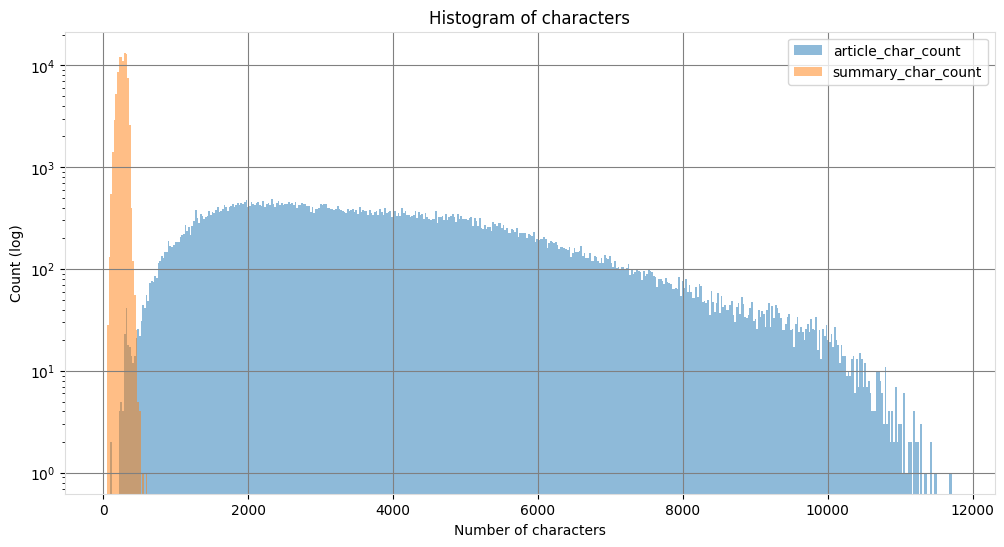

In [32]:
plot_histo(corpus, 
                   ['article_char_count', 'summary_char_count'],
                   ['article', 'summary'],
                    'Histogram of characters',
                    'Number of characters',
                    'Count (log)',
                   bins = 500)
                   

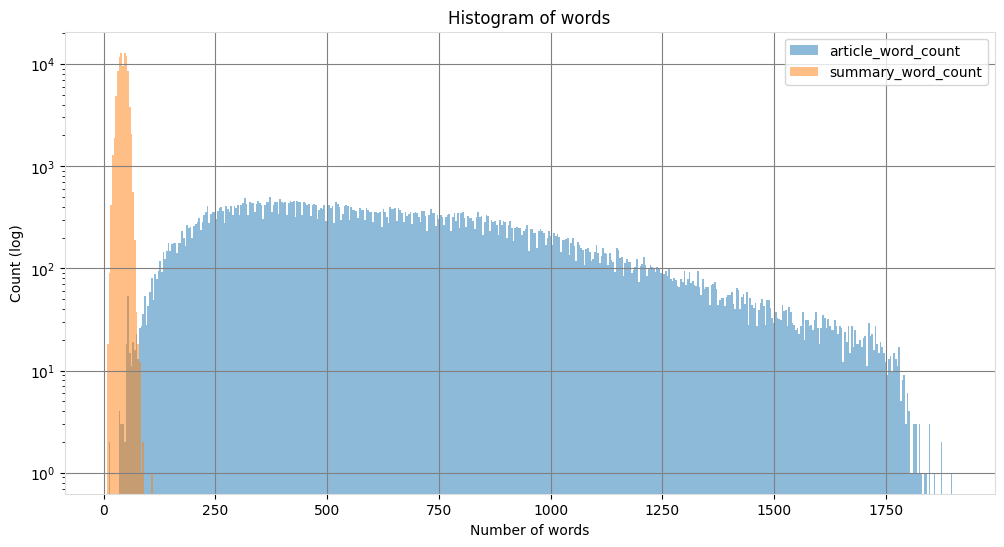

In [33]:
plot_histo(corpus, 
                   ['article_word_count', 'summary_word_count'],
                   ['article', 'summary'],
                    'Histogram of words',
                    'Number of words',
                    'Count (log)',
                   bins = 500)

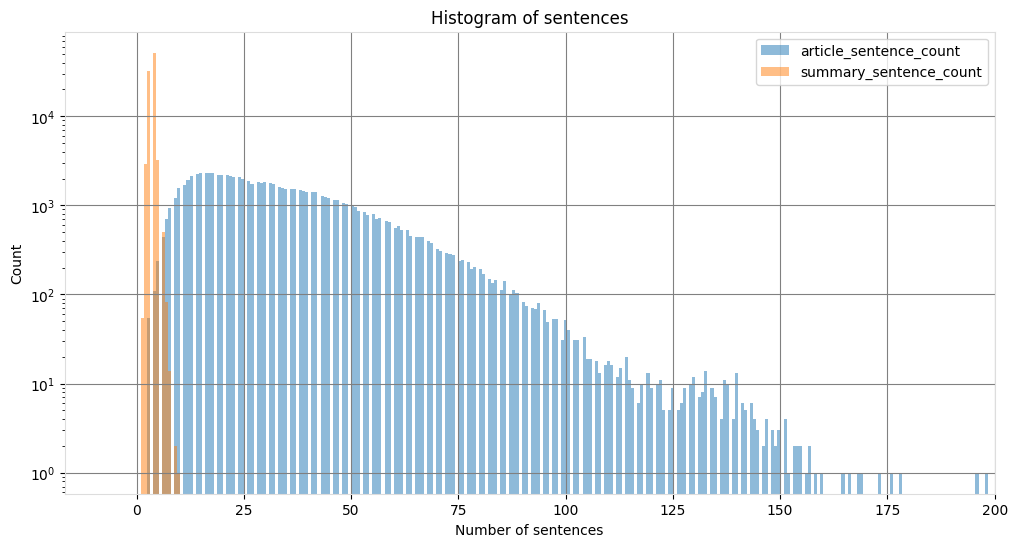

In [34]:
plot_histo(corpus, 
                   ['article_sentence_count', 'summary_sentence_count'],
                   ['article', 'summary'],
                    'Histogram of sentences',
                    'Number of sentences',
                    'Count',
                   bins = 500,
                   logy = True,
                    xmax = 200)

In [35]:
def create_dictionaries_tables(text_list):
    
    freq_words = dict()
    freq_stems = dict()
    freq_lemmas = dict()
   
    for text in text_list:
    # Removing stop words
        stop_words = set(stopwords.words('english'))
        words = tokens_without_punctuation(text)
    
    # Reducing words to their root form with stems and lemmas
        stem = PorterStemmer()
        lem = WordNetLemmatizer()
    
    # Creating dictionaries for the word, stem and lemma frequencies
        for word in words:
            # dictionary of words
            if word in stop_words:
                continue
            if word in freq_words:
                freq_words[word] += 1
            else:
                freq_words[word] = 1
            # dictionary of stems        
            stemed = stem.stem(word)
            if stemed in stop_words:
                continue
            if stemed in freq_stems:
                freq_stems[stemed] += 1
            else:
                freq_stems[stemed] = 1
            # dictionary of lemmas        
            lemma = lem.lemmatize(word)
            if lemma in stop_words:
                continue
            if lemma in freq_lemmas:
                freq_lemmas[lemma] += 1
            else:
                freq_lemmas[lemma] = 1
    
    return freq_words, freq_stems, freq_lemmas

In [36]:
t0 = time.time()
dict_word, dict_stem, dict_lemma = create_dictionaries_tables(corpus['article'].tolist())
print()
print('Total time to execute: {:.2f} minutes'.format((time.time() - t0)/60))


Total time to execute: 29.87 minutes


In [37]:
print('The total number of tokens in the article corpus are:')
print('Words: {:,}'.format(len(dict_word)))
print('Stems: {:,}'.format(len(dict_stem)))
print('Lemmas: {:,}'.format(len(dict_lemma)))

The total number of tokens in the article corpus are:
Words: 400,837
Stems: 299,486
Lemmas: 387,697


In [38]:
t0 = time.time()
dict_word_s, dict_stem_s, dict_lemma_s = create_dictionaries_tables(corpus['summary'].tolist())
print()
print('Total time to execute: {:.2f} minutes'.format((time.time() - t0)/60))


Total time to execute: 3.01 minutes


In [39]:
print('The total number of tokens in the summary corpus are:')
print('Words: {:,}'.format(len(dict_word_s)))
print('Stems: {:,}'.format(len(dict_stem_s)))
print('Lemma: {:,}'.format(len(dict_lemma_s)))

The total number of tokens in the summary corpus are:
Words: 104,373
Stems: 69,845
Lemma: 98,143


In [40]:
def extract_top_n_from_dict(dict_input, n = 20):
    l = []
    for i, (word, count) in enumerate(sorted(dict_input.items(), reverse=True, key=lambda x: x[1])):  
        if i >= n and count<l[-1][1]:
            break
        l.append((word, count))
    return l

In [41]:
def make_two_bar_charts(list1, list2, title = 'bar chart'):
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig = fig(figsize((12,6)))
    ax1.barh(y = [x[0] for x in list1], width = [x[1]/1000 for x in list1], color = 'blue')
    ax2.barh(y = [x[0] for x in list2], width = [x[1]/1000 for x in list2], color = 'red')
    fig.suptitle(title)
    ax1.set_title('Articles')
    ax2.set_title('Summaries')

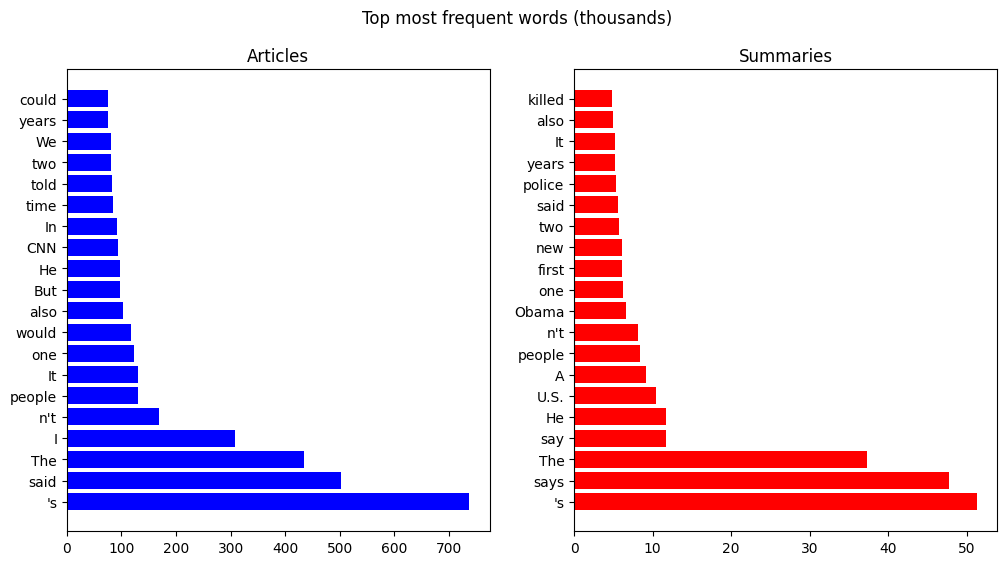

In [42]:
l = extract_top_n_from_dict(dict_word, 20)
l_s = extract_top_n_from_dict(dict_word_s, 20)
make_two_bar_charts(l, l_s, 'Top most frequent words (thousands)')

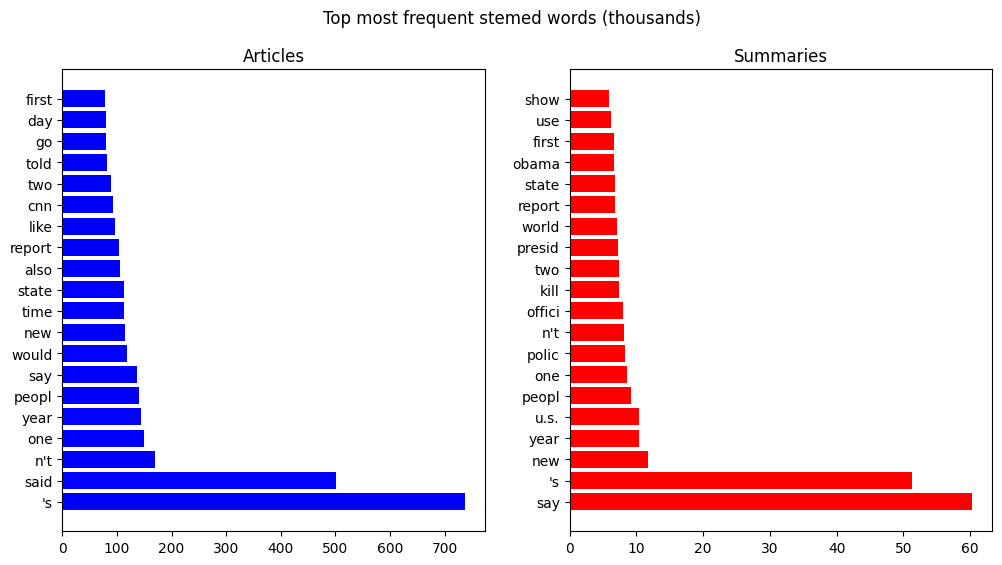

In [43]:
l = extract_top_n_from_dict(dict_stem, 20)
l_s = extract_top_n_from_dict(dict_stem_s, 20)
make_two_bar_charts(l, l_s, 'Top most frequent stemed words (thousands)')

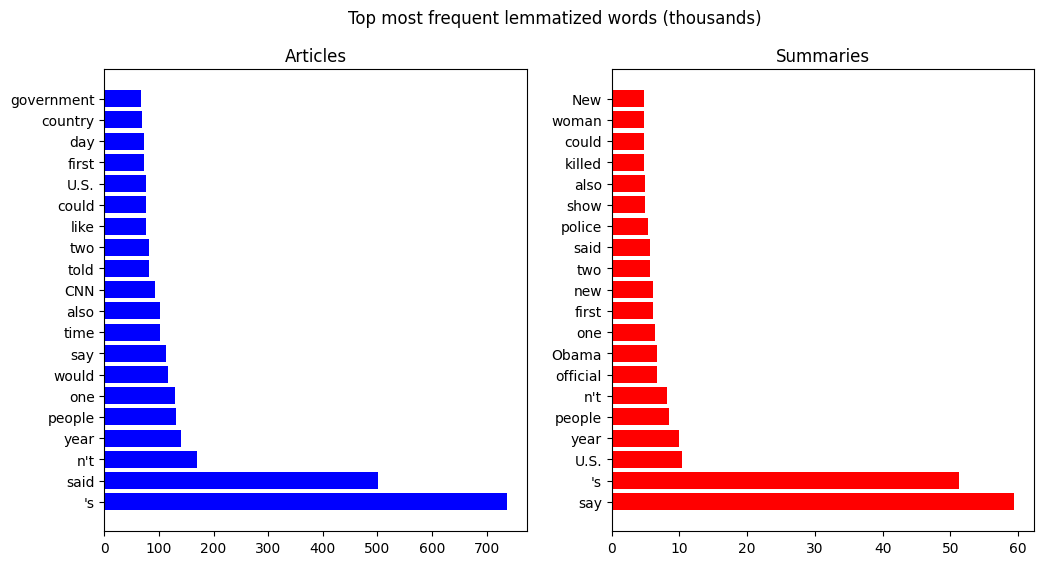

In [44]:
l = extract_top_n_from_dict(dict_lemma, 20)
l_s = extract_top_n_from_dict(dict_lemma_s, 20)
make_two_bar_charts(l, l_s, 'Top most frequent lemmatized words (thousands)')

In [45]:
tokens = dict_word.keys()
tokens_s = dict_word_s.keys()

In [46]:
t0 = time.time()
pos_tags_token = pos_tag(tokens)
pos_tags_token_s = pos_tag(tokens_s)
dict_pos_tags = dict()
dict_pos_tags_s = dict()
for i in pos_tags_token:
    counter = dict_word[i[0]]
    if i[1] in dict_pos_tags:
        dict_pos_tags[i[1]] += counter
    else:
        dict_pos_tags[i[1]] = counter
        
for i in pos_tags_token_s:
    counter = dict_word_s[i[0]]
    if i[1] in dict_pos_tags_s:
        dict_pos_tags_s[i[1]] += counter
    else:
        dict_pos_tags_s[i[1]] = counter 
        
print()
print('Total time to execute: {:.2f} minutes'.format((time.time() - t0)/60))


Total time to execute: 0.85 minutes


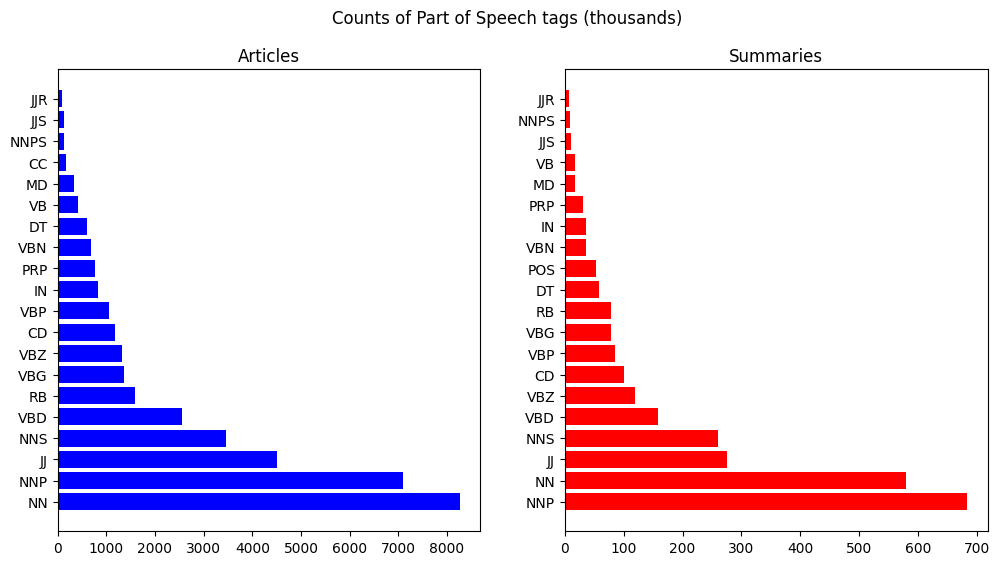

In [47]:
l = extract_top_n_from_dict(dict_pos_tags, 20)
l_s = extract_top_n_from_dict(dict_pos_tags_s, 20)
make_two_bar_charts(l, l_s, 'Counts of Part of Speech tags (thousands)')